# CS2710 Assignment 3
### Jacob Emmerson DUE: September 11th, 12:50pm

In [589]:
import random
import math

In [590]:
Standard_Cities= [
        (7.630520, 3.549164),
        (4.839835, 0.822996),
        (5.043007, 4.991792),
        (2.801917, 2.749705),
        (4.379292, 4.651019),
        (7.828340, 0.882077),
        (2.630909, 6.329537),
        (3.123377, 0.307382),
        (2.813100, 7.403270),
        (5.180621, 5.032747),
        (3.132675, 6.776844),
        (1.100392, 3.105084),
        (6.328253, 6.868632),
        (0.672972, 6.346699),
        (6.531493, 5.135151),
        (3.731491, 1.377488),
        (6.641961, 4.448046),
        (5.286243, 2.896708),
        (3.855679, 2.528306),
        (3.100002, 7.835636),
        (4.750185, 4.513944),
        (4.056279, 6.779125),
        (3.670612, 7.973412),
        (2.040161, 2.187459),
        (7.068120, 6.700557),
        (2.524146, 2.151348),
        (7.010522, 6.929094),
        (5.296346, 1.146134),
        (1.457847, 3.339806),
        (2.360706, 0.967076),
        (6.785015, 5.049559),
        (1.088368, 6.888971),
        (7.200540, 1.790072),
        (3.828022, 2.041351),
        (3.890284, 1.638676),
        (3.579832, 6.441091),
        (3.656363, 2.923428),
        (6.521193, 7.968213),
        (6.703210, 6.748472),
        (6.469462, 2.326698),
        (3.701814, 5.000961),
        (1.835885, 5.525316),
        (7.569855, 5.431781),
        (2.030067, 3.869593),
        (2.508856, 3.872015),
        (6.101347, 2.566932),
        (5.761558, 5.247081),
        (1.150817, 0.320061),
        (3.387590, 5.463640),
        (1.617236, 7.775387),
        (4.250819, 0.155697),
        (0.137775, 1.977584),
        (5.673515, 6.554512),
        (7.921431, 0.129109),
        (2.177936, 4.165043),
        (4.741635, 5.255069),
        (2.445578, 2.280457),
        (1.188459, 3.094138),
        (2.037981, 6.401203),
        (3.903425, 5.620263),    
        ]

In [591]:
class TSP_Problem:
    
    Cities=[]
    NumCities=0
    
    
    def __init__(self, Cities):
        self.Cities=Cities
        self.NumCities=len(self.Cities)
    
    # generates a random tour
    def generate_random_tour(self):
        return [0] + random.sample(range(1,self.NumCities),self.NumCities-1) # order in which cities are visited

    # generates a new tour using a local permutation of a tour
    # this local permutation is also used to implement mutate op if used in the GA            
    def permute_tour(self, tour):
        end_points=random.sample(range(self.NumCities),2)
#        print(end_points)
        if (end_points[0]< end_points[1]):
            new_tour=tour[0:end_points[0]+1]+ list(reversed(tour[end_points[0]+1: end_points[1]]))+tour[end_points[1]:self.NumCities]
        else:
            auxtour=tour+tour
            #print('Aux tour {}'.format(auxtour))
            end_points[1]=end_points[1]+self.NumCities
            newa_tour=auxtour[end_points[0]:end_points[0]+1]+ list(reversed(auxtour[end_points[0]+1: end_points[1]])) + auxtour[end_points[1]:end_points[0]+self.NumCities]
            #print("Intermediate step {}".format(newa_tour))
            j=newa_tour.index(0)
            new_tour=newa_tour[j:]+newa_tour[0:j]
        return new_tour
    
    # defines crossover of the two tours for use in the GA
    # generates two new tours
    def crossover_tours(self,tour1,tour2):
        child1 = []
        child2=[]
        tour1aux=tour1+tour1
        tour2aux=tour2+tour2
        end_points=random.sample(range(self.NumCities),2)
#        print(end_points)
        if (end_points[0]> end_points[1]):
            end_points[1]=end_points[1]+self.NumCities
        #generate the first child
        childP1 = []
        childP2 = []
        for i in range(end_points[0], end_points[1]):
            childP1.append(tour1aux[i])
        childP2 = [item for item in tour2aux[end_points[0]:end_points[0]+self.NumCities] if item not in childP1]
        child1 = childP1 + childP2
        j=child1.index(0)
        child1=child1[j:]+child1[0:j]
        # generate the second child
        childP1 = []
        childP2 = []
        for i in range(end_points[0], end_points[1]):
            childP1.append(tour2aux[i])
        childP2 = [item for item in tour1aux[end_points[0]:end_points[0]+self.NumCities] if item not in childP1]
        child2 = childP1 + childP2
        j=child2.index(0)
        child2=child2[j:]+child2[0:j]    
        return [child1,child2]
    # evaluates the quality of a tour
    def evaluate_tour(self,tour):
        res=0
        for i in range(self.NumCities-1):
            res+=self.TSP_Distance(self.Cities[tour[i]],self.Cities[tour[i+1]])
        return res+self.TSP_Distance(self.Cities[tour[self.NumCities-1]],self.Cities[tour[0]])
    # calculates a TSP distance in between two cities (currently uses Manhattan distance)
    def TSP_Distance(self,coord1,coord2):
        ## implements Manhattan distance
        res=0
        for i in range(len(coord1)):
            res+=abs(coord1[i]-coord2[i])
        return res

# Part a.

### pseudo code

In [592]:
'''
current = random state
E = manhattan distance

for s in no_of_steps:
    candidate_state = random local neighbor of current state
    if candidate.E > current.E:
        accept the candidate
    else:
        calculate p(ACCEPT) and use p(ACCEPT) to decide whether to accept

return best state
'''
pass

def adjust_temp(init, k, i)

$$
T_i = \frac{T_{init}}{k} * (k - i)
$$

return T_i

In [593]:
def adjust_temp_linear(init_temp, no_of_steps, current_step):
    if current_step == 0:
        return init_temp
    
    k = no_of_steps
    i = current_step
    adj_temp = (init_temp / k) * (k - i)

    return adj_temp

In [601]:
def adjust_temp_stag_log(init_temp, no_of_steps, current_step, params = {'slope' : -1/5000, 'mid_adj' : 0}):
    k = no_of_steps
    i = current_step
    C = 1/10000 # prevents float div by 0

    beta = -params['slope'] * 4
    alpha = -(((k/2) + params['mid_adj']) * beta)
    s = alpha + beta * i

    adj_temp = (1 / (1 + math.e**(-s))) * init_temp

    return (init_temp - adj_temp) + C

In [595]:
def compute_probability(energy_diff, temp):
    return math.e ** (energy_diff / temp)

In [596]:
def sim_anneal(TSP_problem, no_of_steps, init_temperature):

    problem = TSP_problem
    curr_E = 0 # objective function (energy) : manhattan distance
    temp = init_temperature
    accepted_tours = 0
    tried_tours = 0
    best_tour = []
    best_E = 0

    current = problem.generate_random_tour() # random start
    curr_E = problem.evaluate_tour(current) 

    init_tour = current
    init_E = curr_E
    for s in range(no_of_steps):
        candidate = problem.permute_tour(tour = current) # attach opposites
        cand_E = problem.evaluate_tour(candidate)
        tried_tours += 1 

        d_E = cand_E - curr_E # energy difference; d_E < 0 indicates lower total man. dist.
        if d_E < 0: # update best
            accepted_tours += 1
            current = candidate
            curr_E = cand_E
            best_tour = candidate
            best_E = curr_E

        else: # otherwise use prob 
            prob = compute_probability(-d_E, temp) # negate energy diff so p in [0,1]

            if random.random() <= prob: # accept but don't update best... prob -> 0, progressively accept less
                accepted_tours += 1
                current = candidate
                curr_E = cand_E

        # update temp from steps
        temp = adjust_temp_linear(init_temp = init_temperature, 
                           no_of_steps = no_of_steps + 1, 
                           current_step = s)

    return {
        'Initial Tour' : init_tour,
        'Initial Distance' : init_E,
        'Initial Temperature' : init_temperature,
        'Tours Tried' : tried_tours,
        'Tours Accepted' : accepted_tours,
        'Best Tour' : best_tour,
        'Best Distance' : best_E
    }

In [610]:
def sim_anneal_stag_log(TSP_problem, no_of_steps, init_temperature, temp_params = {
                                                                                    'slope' : -1/20000,
                                                                                    'mid_adj' : 0
                                                                                }):

    problem = TSP_problem
    curr_E = 0 # objective function (energy) : manhattan distance
    temp = init_temperature
    accepted_tours = 0
    tried_tours = 0
    best_tour = []
    best_E = 0

    current = problem.generate_random_tour() # random start
    curr_E = problem.evaluate_tour(current) 

    init_tour = current
    init_E = curr_E
    for s in range(no_of_steps):
        candidate = problem.permute_tour(tour = current) # attach opposites
        cand_E = problem.evaluate_tour(candidate)
        tried_tours += 1 

        d_E = cand_E - curr_E # energy difference; d_E < 0 indicates lower total man. dist.
        if d_E < 0: # update best
            accepted_tours += 1
            current = candidate
            curr_E = cand_E
            best_tour = candidate
            best_E = curr_E

        else: # otherwise use prob 
            prob = compute_probability(-d_E, temp) # negate energy diff so p in [0,1]

            if random.random() <= prob: # accept but don't update best... prob -> 0, progressively accept less
                accepted_tours += 1
                current = candidate
                curr_E = cand_E

        # update temp from steps
        temp = adjust_temp_stag_log(
                            init_temp = init_temperature, 
                            no_of_steps = no_of_steps + 1, 
                            current_step = s,
                            params = temp_params
                           )

    return {
        'Initial Tour' : init_tour,
        'Initial Distance' : init_E,
        'Initial Temperature' : init_temperature,
        'Tours Tried' : tried_tours,
        'Tours Accepted' : accepted_tours,
        'Best Tour' : best_tour,
        'Best Distance' : best_E
    }

In [598]:
problem = TSP_Problem(Standard_Cities)
s = sim_anneal(TSP_problem = problem, no_of_steps = 100000, init_temperature = 100)

for k,v in s.items():
    print(f"{k} = {v}")

Initial Tour = [0, 40, 56, 8, 10, 35, 12, 29, 26, 30, 31, 47, 28, 37, 39, 19, 6, 13, 52, 57, 11, 33, 58, 3, 38, 27, 44, 16, 43, 34, 21, 51, 18, 54, 24, 14, 4, 41, 46, 5, 59, 1, 50, 42, 22, 9, 36, 15, 48, 32, 25, 49, 20, 2, 53, 45, 55, 7, 23, 17]
Initial Distance = 301.4689300000001
Initial Temperature = 100
Tours Tried = 100000
Tours Accepted = 92524
Best Tour = [0, 16, 42, 30, 46, 9, 2, 52, 38, 26, 24, 12, 14, 37, 19, 22, 21, 35, 31, 49, 8, 10, 6, 58, 13, 51, 47, 28, 57, 11, 41, 55, 4, 20, 40, 59, 48, 54, 43, 44, 3, 29, 23, 56, 25, 18, 33, 32, 39, 45, 5, 53, 1, 27, 50, 34, 15, 7, 36, 17]
Best Distance = 95.58391799999998


In [611]:
problem = TSP_Problem(Standard_Cities)
s = sim_anneal_stag_log(TSP_problem = problem, no_of_steps = 100000, init_temperature = 100)

for k,v in s.items():
    print(f"{k} = {v}")

Initial Tour = [0, 22, 35, 39, 37, 47, 3, 25, 40, 12, 6, 52, 8, 33, 31, 44, 9, 34, 59, 14, 41, 56, 7, 51, 17, 13, 55, 19, 23, 24, 42, 16, 49, 20, 10, 48, 28, 27, 32, 43, 5, 21, 2, 46, 18, 58, 1, 30, 29, 53, 45, 50, 54, 26, 11, 36, 38, 4, 15, 57]
Initial Distance = 317.22830999999996
Initial Temperature = 100
Tours Tried = 100000
Tours Accepted = 67105
Best Tour = [0, 16, 30, 14, 46, 42, 24, 26, 38, 37, 12, 52, 21, 22, 19, 8, 49, 31, 13, 58, 6, 10, 35, 59, 55, 9, 2, 20, 4, 40, 48, 41, 54, 43, 44, 3, 36, 18, 33, 34, 15, 25, 56, 23, 28, 57, 11, 51, 47, 29, 7, 50, 1, 27, 17, 45, 39, 32, 5, 53]
Best Distance = 66.87408599999999


if $i \geq \frac{k}{2}$

\begin{align*}
T_i &= \frac{T_{init}}{k} * (k - (i - \frac{k}{2})^2) \\
\end{align*}

else:
$$
T_i = T_{init}
$$

# Part b.

In [102]:
best = {'Best Distance' : 10000}

for i in range(50):
    s = sim_anneal(TSP_problem = problem, no_of_steps = 1000, init_temperature = 100 - i)
    if s['Best Distance'] < best['Best Distance']:
        print(f'new best on run {i}')
        best = s

for k,v in best.items():
    print(f"{k} = {v}")

new best on run 0
new best on run 1
new best on run 5
new best on run 31
new best on run 33
new best on run 36
Initial Tour = [0, 2, 35, 28, 36, 59, 46, 44, 33, 8, 31, 23, 26, 5, 24, 30, 50, 27, 32, 42, 12, 1, 10, 47, 19, 18, 6, 55, 54, 51, 57, 39, 29, 52, 25, 20, 40, 3, 7, 48, 49, 34, 38, 45, 14, 21, 37, 56, 16, 41, 4, 22, 17, 58, 9, 43, 53, 13, 11, 15]
Initial Distance = 313.539542
Initial Temperature = 64
Tours Tried = 1000
Tours Accepted = 908
Best Tour = [0, 29, 5, 30, 24, 12, 6, 25, 36, 18, 9, 2, 48, 17, 50, 15, 3, 58, 59, 14, 28, 43, 56, 23, 27, 7, 20, 46, 32, 16, 42, 38, 45, 53, 39, 35, 33, 55, 8, 37, 26, 52, 21, 40, 22, 10, 31, 19, 49, 57, 13, 54, 4, 34, 51, 41, 44, 47, 11, 1]
Best Distance = 203.77241600000005


In [105]:
best = {'Best Distance' : 10000}

for i in range(1,500000,5000):
    s = sim_anneal(TSP_problem = problem, no_of_steps = i, init_temperature = 70)
    if s['Best Distance'] < best['Best Distance']:
        print(f'new best with steps = {i}')
        best = s

for k,v in best.items():
    print(f"{k} = {v}")

new best with steps = 1
new best with steps = 5001
new best with steps = 15001
new best with steps = 20001
new best with steps = 40001
new best with steps = 60001
new best with steps = 65001


KeyboardInterrupt: 

# Part c.

In [348]:
import seaborn as sns
from matplotlib import pyplot as plt

In [532]:
4/1000 * 25000

100.0

(0.0, 110.0)

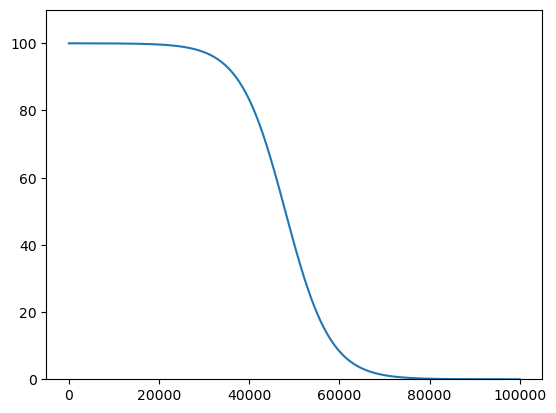

In [605]:
lst = []
slope = -1/20000 # how steep the slope is
mid = -2000 # do you want to make less or more random choices


for i in [x for x in range(100000)]:
    lst.append(adjust_temp_stag_log(
        init_temp = 100,
        no_of_steps = 100000,
        current_step = i,
        params = {
            'slope' : slope,
            'mid_adj' : mid
        }
    ))

ax = sns.lineplot(x = [x for x in range(100000)], y = lst)
ax.set_ylim(0,110)

In [630]:
import itertools as it

In [669]:
tours = []
problem = TSP_Problem(Standard_Cities)

for t in range(10):
    tour = sim_anneal_stag_log(TSP_problem = problem, no_of_steps = 20000, init_temperature = 70,
                               temp_params={'slope' : -1/5000, 'mid_adj' : -8000})  # max(slope) = slope
                                                                                    # d2/dx(slope) = 0 @ x = (no_of_steps / 2) + mid_adj
    tours.append(tour['Best Distance'])

print([round(n,2) for n in tours])
print(f"tours mean dist.  = {sum(tours)/len(tours)}")

[69.86, 70.03, 70.41, 69.88, 67.11, 68.15, 71.13, 66.07, 69.18, 70.13]
tours mean dist.  = 69.19548259999999
